# Predicting weight of a person using their height

Import the required modules


In [357]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

Read the datasets

The dataset has been taken from kaggle.com link: https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset

In [358]:
df1=pd.read_csv("HeightWeight.csv")
print(df1)

       Index  Height(Inches)  Weight(Pounds)
0          1        65.78331        112.9925
1          2        71.51521        136.4873
2          3        69.39874        153.0269
3          4        68.21660        142.3354
4          5        67.78781        144.2971
...      ...             ...             ...
24995  24996        69.50215        118.0312
24996  24997        64.54826        120.1932
24997  24998        64.69855        118.2655
24998  24999        67.52918        132.2682
24999  25000        68.87761        124.8742

[25000 rows x 3 columns]


# Data Analyzing

In [359]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.0 KB


In [360]:
#Check for null values
df1.isnull().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [361]:
#Calculating mean,count and other numerical columns
df1.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [362]:
#drop features not required for prediction
df2=df1.drop("Index",axis=1)

In [363]:
df3=df2.rename(columns={"Height(Inches)":"height","Weight(Pounds)":"weight"})
df3.head()

,height,weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [364]:
# Adding new column BMI
df3["BMI"]=703*df3['weight']/(df3['height'] * df3['height'])
df3.head()

,height,weight,BMI
0,65.78331,112.9925,18.355808
1,71.51521,136.4873,18.760773
2,69.39874,153.0269,22.336747
3,68.21660,142.3354,21.502458
4,67.78781,144.2971,22.075458


In [365]:
df3.describe()

,height,weight,BMI
count,25000.000000,25000.000000,25000.000000
mean,67.993114,127.079421,19.319597
std,1.901679,11.660898,1.551746
min,60.278360,78.014760,13.069569
25%,66.704397,119.308675,18.276526
50%,67.995700,127.157750,19.300342
75%,69.272958,134.892850,20.355699
max,75.152800,170.924000,26.021149


Visualising the data for better understanding 

Text(0.5, 1.0, 'Weight v/s Height')

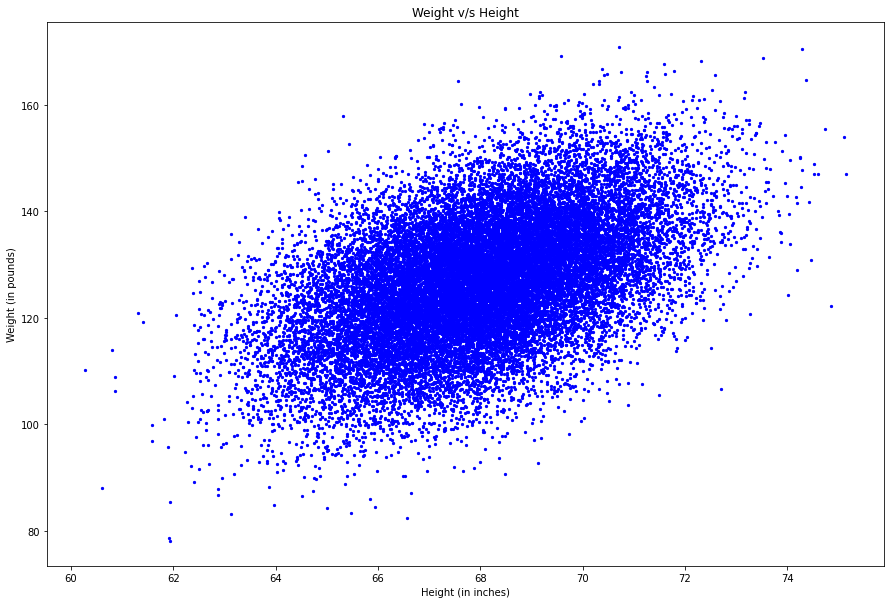

In [366]:
matplotlib.rcParams['figure.figsize']=(15,10)
plt.scatter(df3.height,df3.weight,color='blue',s=5)
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.title('Weight v/s Height')

Removing exception data i.e. data with high BMI or  low BMI

In [367]:
df3.drop(df3[df3['BMI']<18].index,inplace=True)
df3.drop(df3[df3['BMI']>26].index,inplace=True)
df3.head()

,height,weight,BMI
0,65.78331,112.9925,18.355808
1,71.51521,136.4873,18.760773
2,69.39874,153.0269,22.336747
3,68.21660,142.3354,21.502458
4,67.78781,144.2971,22.075458


In [368]:
df3.describe()

,height,weight,BMI
count,20143.000000,20143.000000,20143.000000
mean,67.953398,130.395695,19.846622
std,1.893324,9.797860,1.195786
min,60.278360,99.810740,18.000024
25%,66.666705,123.437600,18.901959
50%,67.962920,129.901800,19.682072
75%,69.241710,136.732600,20.620649
max,75.152800,170.924000,25.400339


# Building the model

In [369]:
x=df3.iloc[:,:-2].values
print(x)

[[65.78331]
 [71.51521]
 [69.39874]
 ...
 [64.69855]
 [67.52918]
 [68.87761]]


In [370]:
y=df3.iloc[:,1].values
print(y)

[112.9925 136.4873 153.0269 ... 118.2655 132.2682 124.8742]


In [371]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.1,shuffle=True)

In [372]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

Model Evaluation 

In [373]:
lr.score(X_test,Y_test)

0.40799755541671423

In [374]:
lrpred = lr.predict(X_test)

In [375]:
from sklearn import metrics
print("R Square = ", metrics.r2_score(Y_test, lrpred))
print("Mean Squared Error = ", metrics.mean_squared_error(Y_test, lrpred))
print("Mean Absolute Error = ", metrics.mean_absolute_error(Y_test, lrpred))

R Square =  0.40799755541671423
Mean Squared Error =  58.87021824849405
Mean Absolute Error =  6.236265335588653


# Predicting weight using height and calculating health status.

In [376]:
h = 68
my_pred_weight = lr.predict([[h]])
print('My predicted weight(in pounds) = ', my_pred_weight)
bmi = (my_pred_weight*703) / (h * h)
if bmi < 18.5:
    print("You are underweight!")
elif bmi >= 18.5 and bmi < 24.9:
    print("You are healthy!")
elif bmi>=24.9 and bmi < 29.9:
    print("You are overweight!")
else:
    print("You are obese!")

My predicted weight(in pounds) =  [130.54944454]
You are healthy!


# Data visualisation

In [377]:
# Preparing X and Y from the given data
df = pd.read_csv("HeightWeight.csv")
dt = df.to_numpy()

X = dt[1:, 1].astype("float64")
Y = dt[1:, 2].astype("float")

Text(0, 0.5, ' Weight (in pounds)')

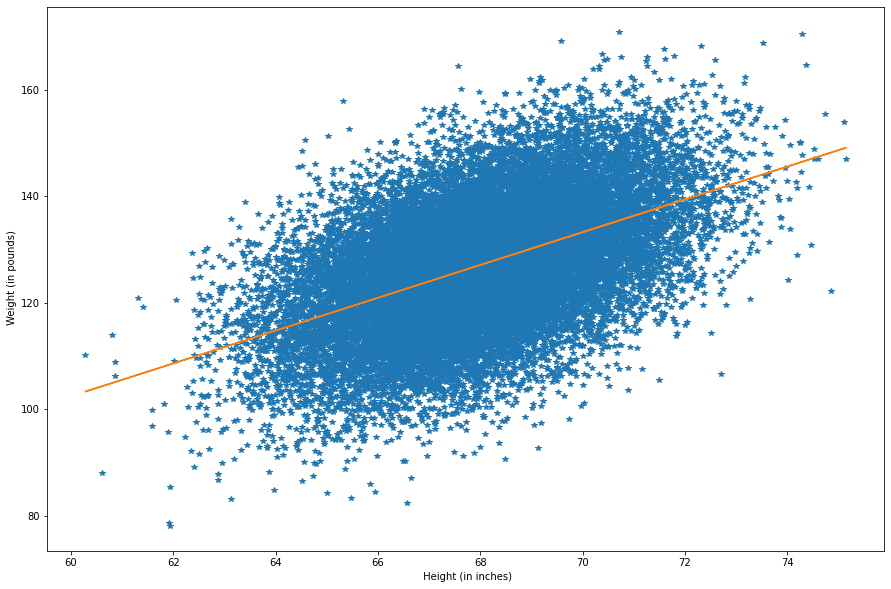

In [378]:
m, b = np.polyfit(X, Y,1)
plt.plot(X, Y, '*')

# Create a scattered plot
plt.plot(X, m*X + b)
plt.xlabel(' Height (in inches)')
plt.ylabel(' Weight (in pounds)')